# Package Imports

## Importing relevant python libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import os
from datetime import datetime
import optuna
import copy
import numpy as np
import torch
from optuna.exceptions import TrialPruned

f:\NTU Projects\sc4001-1\buh\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing our utility scripts

In [2]:
from utils.preprocessing import *
from utils.architectures.hybrid import *
from utils.architectures.gru import *
from utils.training.trainer import *
from utils.training.training import *
from utils.evaluation import *
from utils.postprocessing import *

In [3]:
import random

seed = 42

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed)

# Preprocessing Data

In [4]:
# Set file paths
incart_path = 'INCART 2-lead Arrhythmia Database.csv'
mitbih_train_path = 'data/mitbih_train.csv'
mitbih_test_path = 'data/mitbih_test.csv'

# Create processor instance
processor = ECGDataProcessor(mitbih_train_path, mitbih_test_path, incart_path)

# Load and preprocess data
X_train, X_val, X_test, y_train, y_val, y_test = processor.preprocess_mitbih_data()

# Print final dataset sizes
print("\nFinal dataset sizes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Loading MIT-BIH dataset...
MIT-BIH dataset shape: (87554, 187)

Class distribution in MIT-BIH dataset:
Class 0.0: 72471 samples (82.77%)
Class 1.0: 2223 samples (2.54%)
Class 2.0: 5788 samples (6.61%)
Class 3.0: 641 samples (0.73%)
Class 4.0: 6431 samples (7.35%)

Final dataset sizes:
Training set: (78798, 187, 1)
Validation set: (8756, 187, 1)
Test set: (21892, 187, 1)


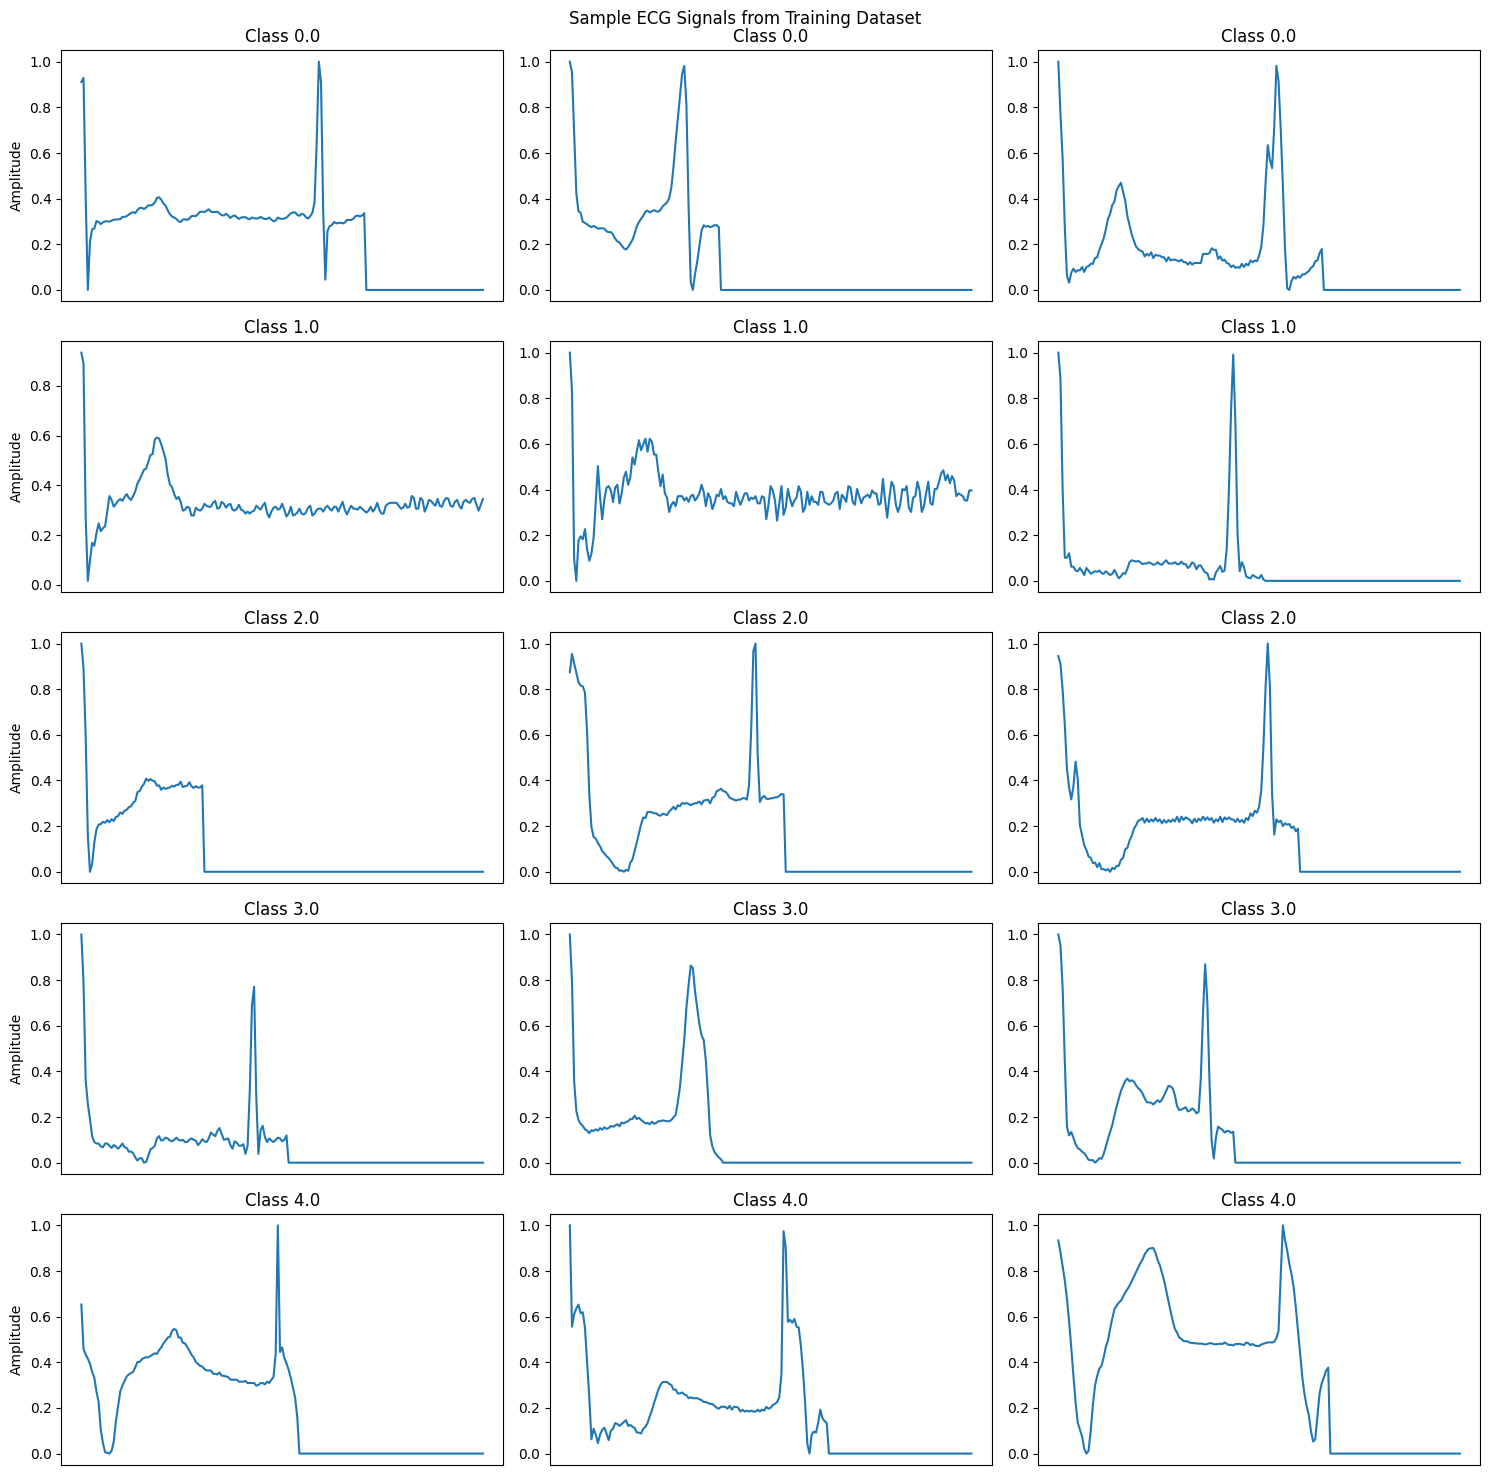


Final dataset sizes:
Training set: (78798, 187, 1)
Validation set: (8756, 187, 1)
Test set: (21892, 187, 1)


In [5]:
 # Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(
    X_train, X_val, X_test, y_train, y_val, y_test
)

# Plot sample signals from each dataset
plot_sample_signals(X_train, y_train, "Training")

# Print final dataset sizes
print("\nFinal dataset sizes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Hybrid Model

## training loop

In [6]:
config = get_training_config()
num_classes = int(len(np.unique(y_train)))
sequence_length = int(X_train.shape[1])

for name, section in config.items():
    mp = section.get('model_params', {})
    if 'num_classes' in mp:
        mp['num_classes'] = num_classes
    if 'sequence_length' in mp:
        mp['sequence_length'] = sequence_length
    
    print(f"Updated configuration: {name}")
    print(f"Number of classes: {num_classes}")
    print(f"Sequence length: {sequence_length}")

Updated configuration: RNN
Number of classes: 5
Sequence length: 187
Updated configuration: CNN
Number of classes: 5
Sequence length: 187
Updated configuration: CNN-RNN
Number of classes: 5
Sequence length: 187
Updated configuration: GRU
Number of classes: 5
Sequence length: 187


In [7]:
model_name = 'CNN-RNN'
model_params = config[model_name]['model_params']

hybrid_model = ECG_CNN_RNN(**model_params)

Using device: cuda

Starting training for CNN-RNN...


Training: 100%|██████████| 2463/2463 [00:44<00:00, 55.57it/s]



Epoch [1/100]
Train Loss: 0.6228, Train Acc: 90.99%
Val Loss: 0.5287, Val Acc: 94.45%
Learning Rate: 0.000680


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.05it/s]



Epoch [2/100]
Train Loss: 0.5477, Train Acc: 94.06%
Val Loss: 0.4900, Val Acc: 96.01%
Learning Rate: 0.001260


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.37it/s]



Epoch [3/100]
Train Loss: 0.5184, Train Acc: 95.11%
Val Loss: 0.4877, Val Acc: 96.29%
Learning Rate: 0.001840


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.52it/s]



Epoch [4/100]
Train Loss: 0.5017, Train Acc: 95.76%
Val Loss: 0.4724, Val Acc: 96.83%
Learning Rate: 0.002420


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.03it/s]



Epoch [5/100]
Train Loss: 0.4928, Train Acc: 96.14%
Val Loss: 0.4731, Val Acc: 96.73%
Learning Rate: 0.003000


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.38it/s]



Epoch [6/100]
Train Loss: 0.4852, Train Acc: 96.38%
Val Loss: 0.4649, Val Acc: 97.19%
Learning Rate: 0.002999


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.51it/s]



Epoch [7/100]
Train Loss: 0.4761, Train Acc: 96.67%
Val Loss: 0.4631, Val Acc: 97.37%
Learning Rate: 0.002997


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.76it/s]



Epoch [8/100]
Train Loss: 0.4718, Train Acc: 96.83%
Val Loss: 0.4591, Val Acc: 97.29%
Learning Rate: 0.002993


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.61it/s]



Epoch [9/100]
Train Loss: 0.4687, Train Acc: 96.93%
Val Loss: 0.4589, Val Acc: 97.33%
Learning Rate: 0.002987


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.76it/s]



Epoch [10/100]
Train Loss: 0.4663, Train Acc: 97.02%
Val Loss: 0.4507, Val Acc: 97.42%
Learning Rate: 0.002980


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.94it/s]



Epoch [11/100]
Train Loss: 0.4606, Train Acc: 97.24%
Val Loss: 0.4424, Val Acc: 97.75%
Learning Rate: 0.002972


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.21it/s]



Epoch [12/100]
Train Loss: 0.4618, Train Acc: 97.14%
Val Loss: 0.4483, Val Acc: 97.57%
Learning Rate: 0.002961


Training: 100%|██████████| 2463/2463 [00:38<00:00, 64.17it/s]



Epoch [13/100]
Train Loss: 0.4579, Train Acc: 97.33%
Val Loss: 0.4428, Val Acc: 97.75%
Learning Rate: 0.002950


Training: 100%|██████████| 2463/2463 [00:38<00:00, 64.19it/s]



Epoch [14/100]
Train Loss: 0.4572, Train Acc: 97.36%
Val Loss: 0.4402, Val Acc: 97.90%
Learning Rate: 0.002936


Training: 100%|██████████| 2463/2463 [00:38<00:00, 63.71it/s]



Epoch [15/100]
Train Loss: 0.4545, Train Acc: 97.47%
Val Loss: 0.4433, Val Acc: 97.84%
Learning Rate: 0.002921


Training: 100%|██████████| 2463/2463 [00:39<00:00, 62.84it/s]



Epoch [16/100]
Train Loss: 0.4538, Train Acc: 97.48%
Val Loss: 0.4480, Val Acc: 97.56%
Learning Rate: 0.002905


Training: 100%|██████████| 2463/2463 [00:39<00:00, 63.10it/s]



Epoch [17/100]
Train Loss: 0.4533, Train Acc: 97.46%
Val Loss: 0.4396, Val Acc: 97.91%
Learning Rate: 0.002887


Training: 100%|██████████| 2463/2463 [00:39<00:00, 62.46it/s]



Epoch [18/100]
Train Loss: 0.4526, Train Acc: 97.54%
Val Loss: 0.4386, Val Acc: 97.75%
Learning Rate: 0.002868


Training: 100%|██████████| 2463/2463 [00:39<00:00, 62.46it/s]



Epoch [19/100]
Train Loss: 0.4503, Train Acc: 97.60%
Val Loss: 0.4397, Val Acc: 97.89%
Learning Rate: 0.002847


Training: 100%|██████████| 2463/2463 [00:38<00:00, 64.78it/s]



Epoch [20/100]
Train Loss: 0.4523, Train Acc: 97.52%
Val Loss: 0.4399, Val Acc: 97.88%
Learning Rate: 0.002825


Training: 100%|██████████| 2463/2463 [00:39<00:00, 62.79it/s]



Epoch [21/100]
Train Loss: 0.4506, Train Acc: 97.59%
Val Loss: 0.4381, Val Acc: 97.90%
Learning Rate: 0.002802


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.11it/s]



Epoch [22/100]
Train Loss: 0.4477, Train Acc: 97.75%
Val Loss: 0.4368, Val Acc: 98.14%
Learning Rate: 0.002777


Training: 100%|██████████| 2463/2463 [00:37<00:00, 64.98it/s]



Epoch [23/100]
Train Loss: 0.4520, Train Acc: 97.54%
Val Loss: 0.4441, Val Acc: 97.83%
Learning Rate: 0.002751


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.27it/s]



Epoch [24/100]
Train Loss: 0.4499, Train Acc: 97.63%
Val Loss: 0.4373, Val Acc: 98.01%
Learning Rate: 0.002723


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.45it/s]



Epoch [25/100]
Train Loss: 0.4507, Train Acc: 97.55%
Val Loss: 0.4368, Val Acc: 98.10%
Learning Rate: 0.002694


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.48it/s]



Epoch [26/100]
Train Loss: 0.4497, Train Acc: 97.63%
Val Loss: 0.4351, Val Acc: 98.18%
Learning Rate: 0.002664


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.01it/s]



Epoch [27/100]
Train Loss: 0.4479, Train Acc: 97.73%
Val Loss: 0.4447, Val Acc: 97.76%
Learning Rate: 0.002633


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.25it/s]



Epoch [28/100]
Train Loss: 0.4516, Train Acc: 97.52%
Val Loss: 0.4402, Val Acc: 97.86%
Learning Rate: 0.002600


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.13it/s]



Epoch [29/100]
Train Loss: 0.4515, Train Acc: 97.58%
Val Loss: 0.4423, Val Acc: 97.75%
Learning Rate: 0.002567


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.29it/s]



Epoch [30/100]
Train Loss: 0.4488, Train Acc: 97.63%
Val Loss: 0.4355, Val Acc: 98.06%
Learning Rate: 0.002532


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.44it/s]



Epoch [31/100]
Train Loss: 0.4467, Train Acc: 97.73%
Val Loss: 0.4441, Val Acc: 97.73%
Learning Rate: 0.002496


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.31it/s]



Epoch [32/100]
Train Loss: 0.4477, Train Acc: 97.68%
Val Loss: 0.4398, Val Acc: 97.98%
Learning Rate: 0.002459


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.45it/s]



Epoch [33/100]
Train Loss: 0.4465, Train Acc: 97.74%
Val Loss: 0.4337, Val Acc: 98.23%
Learning Rate: 0.002422


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.25it/s]



Epoch [34/100]
Train Loss: 0.4458, Train Acc: 97.76%
Val Loss: 0.4341, Val Acc: 98.14%
Learning Rate: 0.002383


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.27it/s]



Epoch [35/100]
Train Loss: 0.4449, Train Acc: 97.83%
Val Loss: 0.4357, Val Acc: 98.09%
Learning Rate: 0.002343


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.15it/s]



Epoch [36/100]
Train Loss: 0.4453, Train Acc: 97.77%
Val Loss: 0.4320, Val Acc: 98.23%
Learning Rate: 0.002303


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.44it/s]



Epoch [37/100]
Train Loss: 0.4428, Train Acc: 97.89%
Val Loss: 0.4329, Val Acc: 98.18%
Learning Rate: 0.002261


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.61it/s]



Epoch [38/100]
Train Loss: 0.4426, Train Acc: 97.90%
Val Loss: 0.4342, Val Acc: 98.18%
Learning Rate: 0.002219


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.06it/s]



Epoch [39/100]
Train Loss: 0.4436, Train Acc: 97.85%
Val Loss: 0.4350, Val Acc: 98.17%
Learning Rate: 0.002176


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.38it/s]



Epoch [40/100]
Train Loss: 0.4422, Train Acc: 97.92%
Val Loss: 0.4422, Val Acc: 97.82%
Learning Rate: 0.002132


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.48it/s]



Epoch [41/100]
Train Loss: 0.4427, Train Acc: 97.87%
Val Loss: 0.4295, Val Acc: 98.22%
Learning Rate: 0.002088


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.11it/s]



Epoch [42/100]
Train Loss: 0.4405, Train Acc: 97.94%
Val Loss: 0.4291, Val Acc: 98.37%
Learning Rate: 0.002043


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.83it/s]



Epoch [43/100]
Train Loss: 0.4383, Train Acc: 98.06%
Val Loss: 0.4273, Val Acc: 98.38%
Learning Rate: 0.001998


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.43it/s]



Epoch [44/100]
Train Loss: 0.4399, Train Acc: 97.98%
Val Loss: 0.4306, Val Acc: 98.32%
Learning Rate: 0.001952


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.84it/s]



Epoch [45/100]
Train Loss: 0.4373, Train Acc: 98.07%
Val Loss: 0.4291, Val Acc: 98.47%
Learning Rate: 0.001906


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.42it/s]



Epoch [46/100]
Train Loss: 0.4359, Train Acc: 98.21%
Val Loss: 0.4308, Val Acc: 98.30%
Learning Rate: 0.001859


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.00it/s]



Epoch [47/100]
Train Loss: 0.4355, Train Acc: 98.18%
Val Loss: 0.4312, Val Acc: 98.26%
Learning Rate: 0.001812


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.29it/s]



Epoch [48/100]
Train Loss: 0.4353, Train Acc: 98.21%
Val Loss: 0.4306, Val Acc: 98.34%
Learning Rate: 0.001765


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.13it/s]



Epoch [49/100]
Train Loss: 0.4342, Train Acc: 98.25%
Val Loss: 0.4328, Val Acc: 98.21%
Learning Rate: 0.001717


Training: 100%|██████████| 2463/2463 [00:37<00:00, 65.47it/s]


Early stopping triggered at epoch 50
Restored best model from early stopper


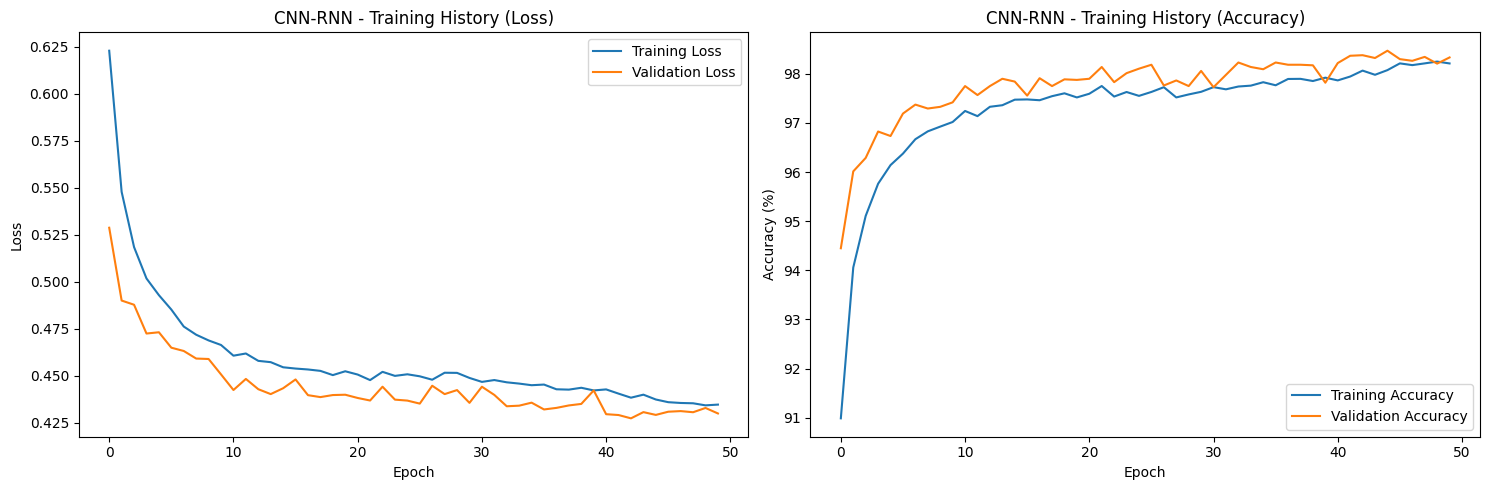

Testing: 100%|██████████| 685/685 [00:02<00:00, 235.32it/s]



Classification Report (CNN-RNN):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.92      0.73      0.82       556
           2       0.96      0.94      0.95      1448
           3       0.81      0.78      0.80       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.89      0.91     21892
weighted avg       0.98      0.98      0.98     21892



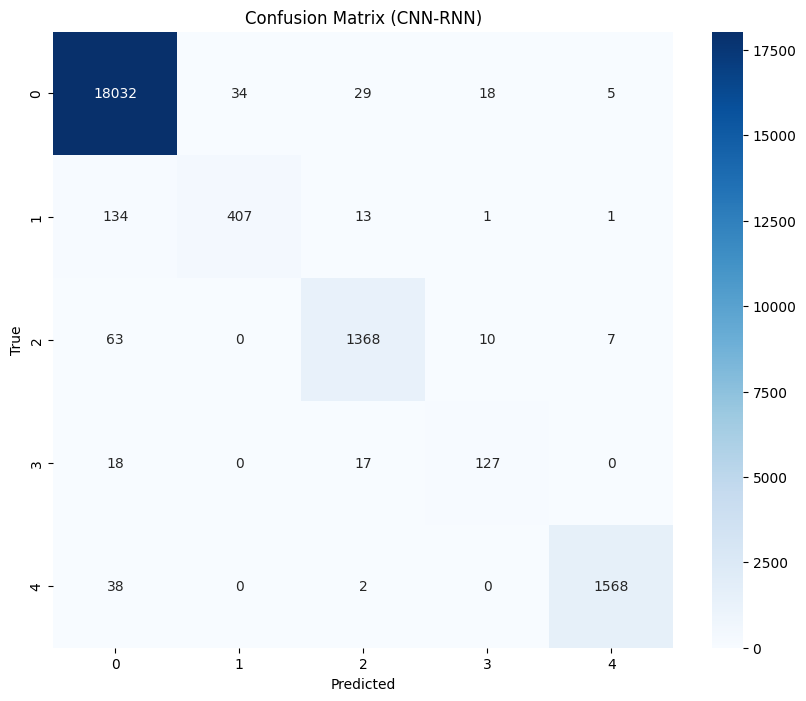

In [8]:
# Train models
hybrid_trainer = train_model(hybrid_model, train_loader, val_loader, test_loader)

## Evaluation Loop

In [9]:
# Create test loader
test_dataset = ECGDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get accuracies
accuracy = get_test_accuracy(hybrid_trainer.model, test_loader, device, model_name)

print("\nSummary:")
print(f"{hybrid_model.model_name} Test Accuracy: {accuracy:.2f}%")


Evaluating CNN-RNN model...
CNN-RNN Test Accuracy: 98.22%

Summary:
CNN-RNN Test Accuracy: 98.22%


# GRU Model

## Training Loop

In [10]:
# Create model instance
model_name = 'GRU'
model_params = config[model_name]['model_params']

#gru_model = AttentionRNN(**model_params).to(device)
gru_model = AttentionRNN(**model_params)

Using device: cuda

Starting training for GRU...


Training: 100%|██████████| 2463/2463 [00:13<00:00, 179.74it/s]



Epoch [1/100]
Train Loss: 0.7820, Train Acc: 86.72%
Val Loss: 0.5980, Val Acc: 92.60%
Learning Rate: 0.000680


Training: 100%|██████████| 2463/2463 [00:12<00:00, 189.99it/s]



Epoch [2/100]
Train Loss: 0.5596, Train Acc: 93.70%
Val Loss: 0.4992, Val Acc: 95.61%
Learning Rate: 0.001260


Training: 100%|██████████| 2463/2463 [00:12<00:00, 193.31it/s]



Epoch [3/100]
Train Loss: 0.4973, Train Acc: 96.02%
Val Loss: 0.4623, Val Acc: 97.10%
Learning Rate: 0.001840


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.56it/s]



Epoch [4/100]
Train Loss: 0.4792, Train Acc: 96.76%
Val Loss: 0.4582, Val Acc: 97.20%
Learning Rate: 0.002420


Training: 100%|██████████| 2463/2463 [00:13<00:00, 189.07it/s]



Epoch [5/100]
Train Loss: 0.4691, Train Acc: 97.13%
Val Loss: 0.4525, Val Acc: 97.25%
Learning Rate: 0.003000


Training: 100%|██████████| 2463/2463 [00:13<00:00, 189.39it/s]



Epoch [6/100]
Train Loss: 0.4685, Train Acc: 97.05%
Val Loss: 0.4559, Val Acc: 97.33%
Learning Rate: 0.002999


Training: 100%|██████████| 2463/2463 [00:12<00:00, 189.69it/s]



Epoch [7/100]
Train Loss: 0.4628, Train Acc: 97.28%
Val Loss: 0.4455, Val Acc: 97.72%
Learning Rate: 0.002997


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.29it/s]



Epoch [8/100]
Train Loss: 0.4610, Train Acc: 97.35%
Val Loss: 0.4598, Val Acc: 97.25%
Learning Rate: 0.002993


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.64it/s]



Epoch [9/100]
Train Loss: 0.4592, Train Acc: 97.40%
Val Loss: 0.4952, Val Acc: 95.68%
Learning Rate: 0.002987


Training: 100%|██████████| 2463/2463 [00:12<00:00, 190.75it/s]



Epoch [10/100]
Train Loss: 0.4663, Train Acc: 97.05%
Val Loss: 0.4627, Val Acc: 97.19%
Learning Rate: 0.002980


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.47it/s]



Epoch [11/100]
Train Loss: 0.5622, Train Acc: 93.18%
Val Loss: 0.5580, Val Acc: 93.30%
Learning Rate: 0.002972


Training: 100%|██████████| 2463/2463 [00:12<00:00, 190.31it/s]



Epoch [12/100]
Train Loss: 0.6424, Train Acc: 89.86%
Val Loss: 0.5373, Val Acc: 93.97%
Learning Rate: 0.002961


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.05it/s]



Epoch [13/100]
Train Loss: 0.5605, Train Acc: 93.10%
Val Loss: 0.6780, Val Acc: 87.30%
Learning Rate: 0.002950


Training: 100%|██████████| 2463/2463 [00:12<00:00, 191.08it/s]


Early stopping triggered at epoch 14
Restored best model from early stopper


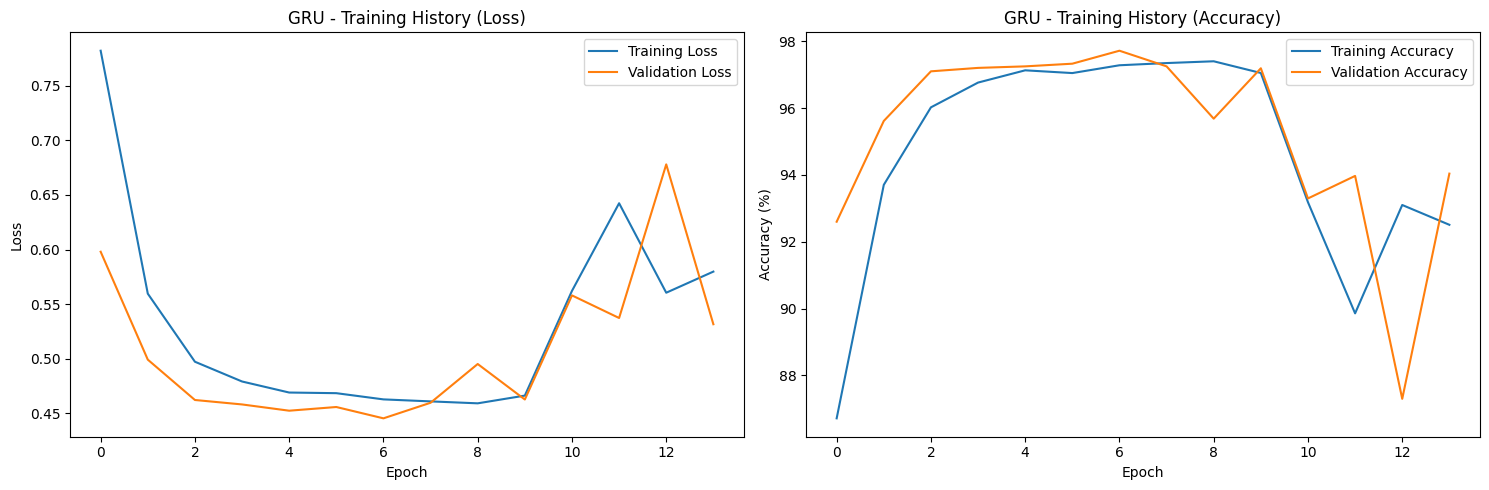

Testing: 100%|██████████| 685/685 [00:01<00:00, 560.97it/s]



Classification Report (GRU):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.94      0.61      0.74       556
           2       0.98      0.89      0.93      1448
           3       0.73      0.78      0.75       162
           4       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.85      0.88     21892
weighted avg       0.98      0.98      0.98     21892



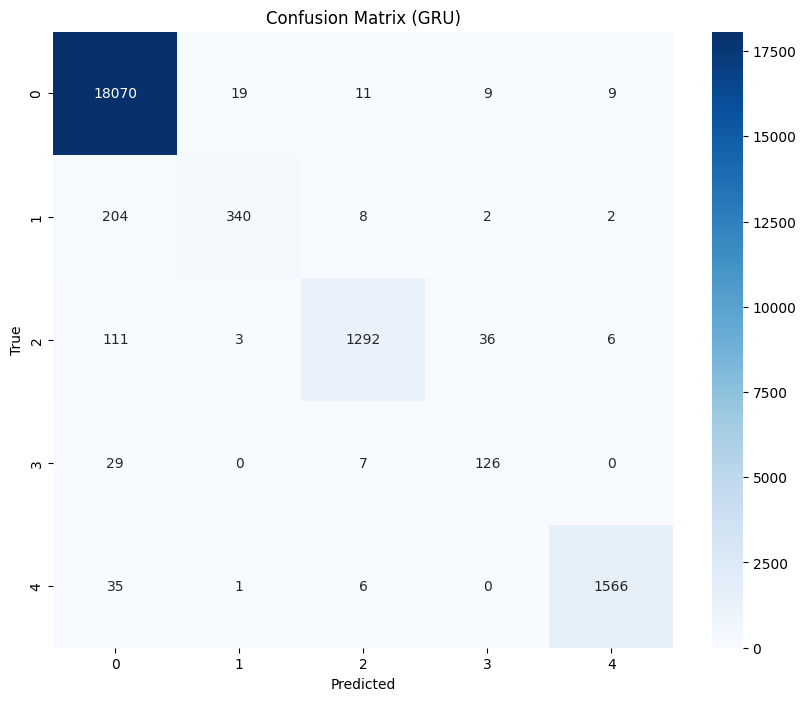

In [11]:
gru_trainer = train_model(gru_model, train_loader, val_loader, test_loader)

In [12]:
#train_and_evaluate()

## Evaluation Loop

In [13]:
# Create test loader
test_dataset = ECGDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get accuracies
accuracy = get_test_accuracy(gru_trainer.model, test_loader, device, model_name)

print("\nSummary:")
print(f"{gru_model.model_name} Test Accuracy: {accuracy:.2f}%")


Evaluating GRU model...
GRU Test Accuracy: 97.73%

Summary:
GRU Test Accuracy: 97.73%


# Hyperparameters Tuning

In [18]:
def objective(trial):
    # sample hyperparameters
    params = {
        'initial_lr': trial.suggest_loguniform('initial_lr', 1e-6, 1e-3),
        'max_lr': trial.suggest_loguniform('max_lr', 1e-4, 1e-2),
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128]),
        'warmup_epochs': trial.suggest_int('warmup_epochs', 0, 10),
        'label_smoothing': trial.suggest_uniform('label_smoothing', 0.0, 0.2),
        'weight_decay': trial.suggest_loguniform('weight_decay', 1e-6, 1e-2),
        'gradient_clip_val': trial.suggest_uniform('gradient_clip_val', 0.0, 1.0),
        'patience': trial.suggest_int('patience', 3, 15),
        'min_delta': trial.suggest_loguniform('min_delta', 1e-5, 1e-2),
    }
    
    model_name = 'CNN-RNN'
    # prepare config copy and update training params
    cfg = copy.deepcopy(config)                     # base_config from get_training_config()
    cfg[model_name]['training_params'].update(params)

    # Create data loaders
    train_loader, val_loader, test_loader = create_data_loaders(
        X_train, X_val, X_test, y_train, y_val, y_test, cfg[model_name]['training_params']['batch_size']
    )

    # Initialize criterion with label smoothing
    criterion = SmoothCrossEntropyLoss(smoothing=cfg[model_name]['training_params']['label_smoothing'])
    
    # create model and trainer
    model = ECG_CNN_RNN(**cfg[model_name]['model_params'])
    trainer = ModelTrainer(model, model_name, device, criterion, cfg[model_name]['training_params'])

    # manual epoch loop to enable pruning
    for epoch in range(min(cfg[model_name]['training_params']['num_epochs'], 50)):  # small budget for tuning
        train_loss, train_acc = trainer.train_epoch(train_loader)
        val_loss, val_acc = trainer.validate(val_loader)

        # report intermediate metric to Optuna and check pruning
        trial.report(val_loss, epoch)                       # or val_loss if minimizing
        if trial.should_prune():
            raise TrialPruned()

    # return final metric (maximize val_acc or minimize val_loss)
    return val_loss

In [19]:
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100)

[I 2025-11-08 19:28:25,573] A new study created in memory with name: no-name-8b08dc5a-7e44-428d-b010-bd07a99afae4
C:\Users\Edwin Lim\AppData\Local\Temp\ipykernel_26076\2864583879.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'initial_lr': trial.suggest_loguniform('initial_lr', 1e-6, 1e-3),
C:\Users\Edwin Lim\AppData\Local\Temp\ipykernel_26076\2864583879.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'max_lr': trial.suggest_loguniform('max_lr', 1e-4, 1e-2),
C:\Users\Edwin Lim\AppData\Local\Temp\ipykernel_26076\2864583879.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/opt

KeyboardInterrupt: 

# DATA AUGMENTATION PORTION

## data augmentation: using stratified split instead to maintain class distribution

In [ ]:
class ECGDataProcessor:
    """
    Class to handle ECG data preprocessing for multiple datasets
    """
    def __init__(self, mitbih_train_path, mitbih_test_path, incart_path):
        self.mitbih_train_path = mitbih_train_path
        self.mitbih_test_path = mitbih_test_path
        self.incart_path = incart_path
        self.scaler = StandardScaler()

    def load_and_preprocess_mitbih(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        return X_train, y_train,X_test, y_test

    def _print_class_distribution(self, dataset_name, y):
        """
        Print class distribution for a dataset
        """
        print(f"\nClass distribution in {dataset_name} dataset:")
        classes = np.unique(y)
        for class_id in classes:
            count = np.sum(y == class_id)
            percentage = (count / len(y)) * 100
            print(f"Class {class_id}: {count} samples ({percentage:.2f}%)")

    def preprocess_mitbih_data(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,
            test_size=0.1,
            random_state=42,
            stratify=y_train # added stratify to our split to keep class distribution
        )

        # Reshape for RNN input (batch_size, sequence_length, input_size)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        return X_train, X_val, X_test, y_train, y_val, y_test

## data augmentation: additive noise + crop

In [ ]:
import numpy as np

def additive_noise(dataset, noise_min= 0.000, noise_max= 0.0369, add_gaussian= True, add_jitter= True):
    noise_lvl = np.random.uniform(noise_min, noise_max)
    noisy_dataset = dataset.copy()

    if add_gaussian:
        gaussian_noise = np.random.normal(loc= 0.0, scale= noise_lvl, size= dataset.shape)
        noisy_dataset += gaussian_noise
    if add_jitter:
        jitter_noise = np.random.uniform(-noise_lvl/2, noise_lvl/2, size=dataset.shape)
        noisy_dataset += jitter_noise

    return dataset

In [ ]:
def crop_dataset(dataset, start_index= None):
    dataset_size = dataset.shape[0]

    if not start_index:
        start_index = 0
    
    crop_size = np.random.randint(0, dataset_size)
    start_index = np.random.randint(0, dataset_size - crop_size + 1)

    end_index = start_index + crop_size
    cropped_dataset = dataset[start_index:end_index]

    final_dataset = np.resize(cropped_dataset, dataset.shape)

    return final_dataset

In [ ]:
exp0 = additive_noise(X_train)

plot_sample_signals(exp0, y_train, "Training")

In [ ]:
# Set file paths
incart_path = 'INCART 2-lead Arrhythmia Database.csv'
mitbih_train_path = 'data/mitbih_train.csv'
mitbih_test_path = 'data/mitbih_test.csv'

# Create processor instance
processor = ECGDataProcessor(mitbih_train_path, mitbih_test_path, incart_path)

# Load and preprocess data
X_train, X_val, X_test, y_train, y_val, y_test = processor.preprocess_mitbih_data()

# Print final dataset sizes
print("\nFinal dataset sizes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

In [ ]:
 # Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(
    X_train, X_val, X_test, y_train, y_val, y_test
)

# Plot sample signals from each dataset
plot_sample_signals(X_train, y_train, "Training")

# Print final dataset sizes
print("\nFinal dataset sizes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

In [ ]:
 # Update configuration based on actual data
model_name = 'CNN-RNN'
config = get_training_config()
num_classes = len(np.unique(y_train))
sequence_length = X_train.shape[1]

config[model_name]['model_params']['num_classes'] = num_classes
config[model_name]['model_params']['sequence_length'] = sequence_length

print("\nUpdated configuration:")
print(f"Number of classes: {num_classes}")
print(f"Sequence length: {sequence_length}")

In [ ]:
model = ECG_CNN_RNN(
    input_channels=config[model_name]['model_params']['input_channels'],
    sequence_length=config[model_name]['model_params']['sequence_length'],
    hidden_size=config[model_name]['model_params']['hidden_size'],
    num_heads=config[model_name]['model_params']['num_heads'],
    num_classes=config[model_name]['model_params']['num_classes'],
    dropout=config[model_name]['model_params']['dropout']
)

In [ ]:
# Train models
trainer = train_model(model_name, X_train, X_val, X_test, y_train, y_val, y_test)

In [ ]:
# Create test loader
test_dataset = ECGDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get accuracies
accuracy = get_test_accuracy(trainer.model, test_loader, device, model_name)

print("\nSummary:")
print(f"RNN Test Accuracy: {accuracy:.2f}%")

In [ ]:
train_and_evaluate()

In [ ]:
# Initialize model
input_size = 1  # Single channel ECG
hidden_size = 128
num_layers = 2
num_classes = 5  

# Create model instance
model = AttentionRNN(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    num_classes=num_classes
).to(device)

# Create test loader if not already created
test_dataset = ECGDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)

# Load the saved model weights
try:
    checkpoint = torch.load('models/gru/ecg_model_final.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Make sure the model file 'ecg_model_final.pth' exists in the current directory")

In [ ]:
test_accuracy = evaluate_attention_rnn(model, test_loader, device)